#### Import Necessary Libraries

In [63]:
import pandas as pd
import os
from glob import glob
import matplotlib.pyplot as plt

#### Merging 12 months of Sales data 


In [31]:
df1=pd.read_csv('Sales_January_2019.csv')
df2=pd.read_csv('Sales_February_2019.csv')
df3=pd.read_csv('Sales_March_2019.csv')
df4=pd.read_csv('Sales_April_2019.csv')
df5=pd.read_csv('Sales_May_2019.csv')
df6=pd.read_csv('Sales_June_2019.csv')
df7=pd.read_csv('Sales_July_2019.csv')
df8=pd.read_csv('Sales_August_2019.csv')
df9=pd.read_csv('Sales_September_2019.csv')
df10=pd.read_csv('Sales_October_2019.csv')
df11=pd.read_csv('Sales_November_2019.csv')
df12=pd.read_csv('Sales_December_2019.csv')

In [33]:
all_sales_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

In [57]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


#### Cleaning the Data

In [40]:
nan_df = all_sales_data[all_sales_data.isna().any(axis=1)]
nan_df.head()

all_sales_data = all_sales_data.dropna(how='all')
all_sales_data


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12


#### Unable to add a month column because of an issue with "Or"

In [46]:
all_sales_data['Month']= all_sales_data['Order Date']. str[0:2]
all_sales_data['Month']= all_sales_data ['Month'].astype('int32')
all_sales_data.head()

ValueError: invalid literal for int() with base 10: 'Or'

#### Determined What Data was Equal to the Month of "OR" 

In [43]:
temp_df=all_sales_data[all_sales_data['Order Date'].str[0:2] == 'Or' ]
temp_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


#### Set the Sales Data to remove the Or values

In [50]:
all_sales_data = all_sales_data[all_sales_data['Order Date'].str[0:2]!= 'Or']

#### Need To Convert Colums to the Correct Type

In [58]:
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered']) # Make int
all_sales_data['Price Each'] = pd.to_numeric(all_sales_data['Price Each']) # Make float

#### Able to Add a Column for Month Now

#### Had to Correct the "Quantity Ordered" and "Price Each"  in order to generate a Sales Column

In [78]:
all_sales_data['Month']= all_sales_data['Order Date']. str[0:2]
all_sales_data['Month']= all_sales_data ['Month'].astype('int32')
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


In [60]:
all_sales_data['Sales'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99


#### Want to Determine Best Month of Sales and The Amount Earned

In [76]:
 all_sales_data.groupby('Month').sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [77]:
results =  all_sales_data.groupby('Month').sum()

#### From the Sales Data, it can be seen that the best month was December and the worst was January. 

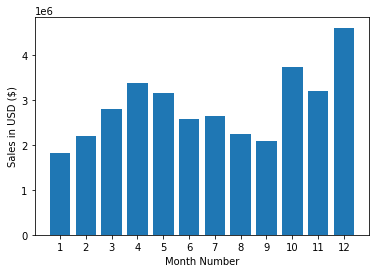

In [71]:
months = range(1,13)
plt.bar(months, results['Sales'])

plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()


#### The Previous Table Visualized

#### What City Had the Highest Number of Sales?
#### Need To Add A City Column

In [88]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_sales_data['City'] = all_sales_data['Purchase Address'].apply(lambda x: get_city(x) + ' ' + get_state(x))

all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


#### A function was defined to get a specific address located in between the commas. Lamda X allows the access of cell contents.

In [91]:
city_results =  all_sales_data.groupby('City').sum()
city_results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2.779908e+06,104794,2.795499e+06
Austin TX,11153,1.809874e+06,69829,1.819582e+06
Boston MA,22528,3.637410e+06,141112,3.661642e+06
Dallas TX,16730,2.752628e+06,104620,2.767975e+06
Los Angeles CA,33289,5.421435e+06,208325,5.452571e+06
New York City NY,27932,4.635371e+06,175741,4.664317e+06
Portland ME,2750,4.471893e+05,17144,4.497583e+05
Portland OR,11303,1.860558e+06,70621,1.870732e+06
San Francisco CA,50239,8.211462e+06,315520,8.262204e+06


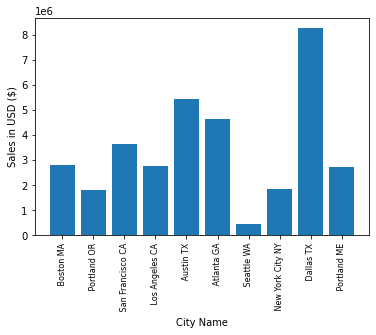

In [102]:
cities = all_sales_data['City'].unique()

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Note: from the table, it is seen that the San Francisco has the highest number of sales. Yet, the graph is displaying that Texas has the highest number of sales. This is an issue.

#### The issue is with the labels as the function is still 1-1 and onto meaning.

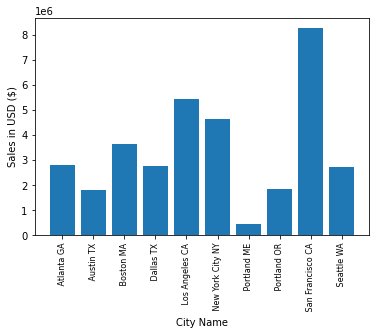

In [105]:
cities = [city for city, df in all_sales_data.groupby('City')]

plt.bar(cities, city_results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

#### Solution: List Comprehension. The data is now correctly displatyed.

#### What time should advertisements be displayed to maximize liklihood of customer's buying power?

In [106]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


#### Looing at the data it, the order date should be converted to a date time in order to more easily access the time of orders.

In [107]:
all_sales_data['Order Date']=pd.to_datetime(all_sales_data['Order Date'])

In [108]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX


#### Order Date is in a new syntax so it worked. Let's grab the specific hour and minute from the Order Date.

In [110]:
all_sales_data['Hour']=all_sales_data['Order Date'].dt.hour
all_sales_data['Minute']=all_sales_data['Order Date'].dt.hour
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,11


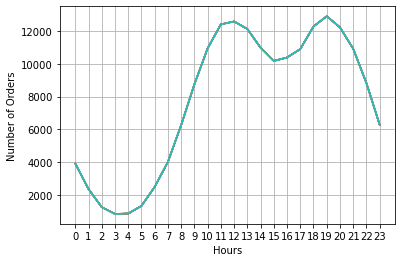

In [121]:
hours =[hour for hour, df in all_sales_data.groupby('Hour')]

plt. plot(hours, all_sales_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hours')
plt.ylabel('Number of Orders')

plt.show()

#### What Proudct Sold the Most?

In [146]:
all_sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,700.00,Boston MA,21,21
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,14.95,Portland OR,14,14
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,23.98,San Francisco CA,13,13
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,149.99,Los Angeles CA,20,20
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,11.99,Austin TX,11,11


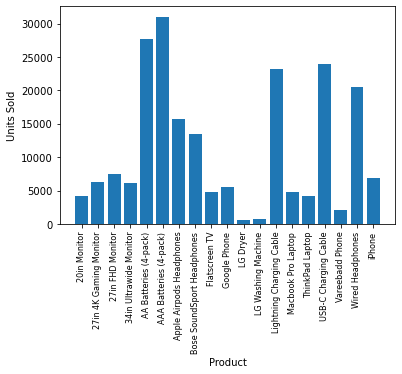

In [159]:
product_group=all_sales_data.groupby('Product')
quantity_ordered=product_group.sum()['Quantity Ordered']
products = [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Units Sold')
plt.xlabel('Product')
plt.show()

####  Are the cheap products selling more than the expensive products?


<ipython-input-161-e8d70317c220>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1. set_xticklabels(products, rotation='vertical', size=8)


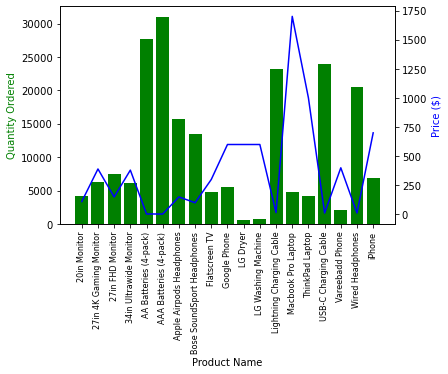

In [161]:
prices= all_sales_data.groupby('Product').mean()['Price Each']

fig, ax1=plt.subplots()
ax2= ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color ='g')
ax2.set_ylabel('Price ($)', color='b')
ax1. set_xticklabels(products, rotation='vertical', size=8)
plt.show()